In [23]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Input
DIS = ctrl.Antecedent(np.linspace(0, 500, 1000), 'DIS')      # Distance
ANG = ctrl.Antecedent(np.linspace(-180, 180, 1000), 'ANG')   # Heading Angle

# Output 
VL = ctrl.Consequent(np.linspace(0, 70, 1000), 'VL')        # Left Wheel Velocity
VR = ctrl.Consequent(np.linspace(0, 70, 1000), 'VR')        # Right Wheel Velocity

/home/tinzog/anaconda3/envs/AI/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


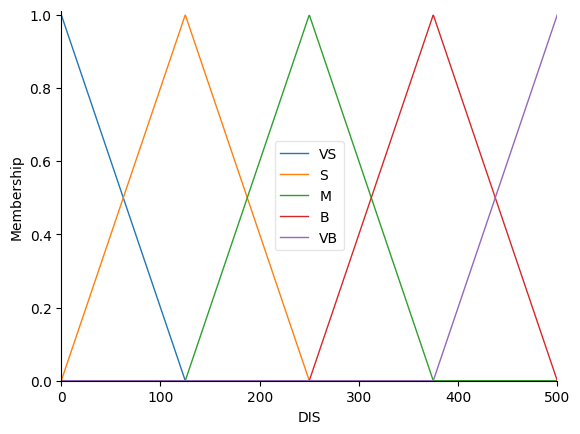

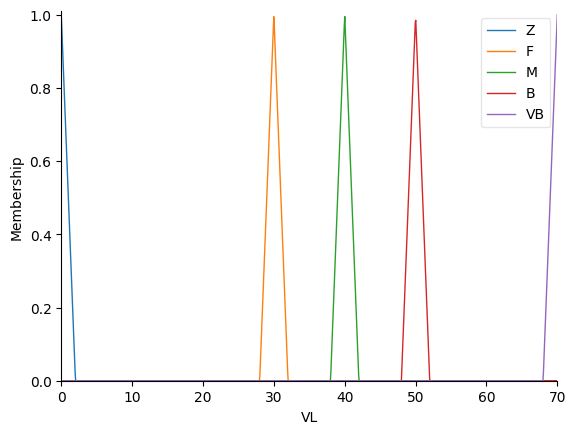

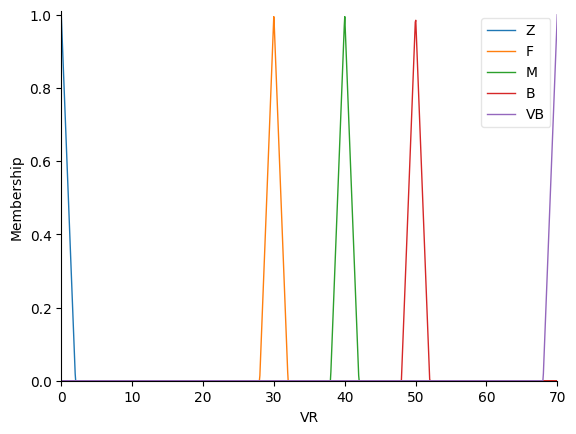

In [25]:
# Membership functions

# DIS
DIS['VS'] = fuzz.trimf(DIS.universe, [  0,   0, 125])   # Very small
DIS['S']  = fuzz.trimf(DIS.universe, [  0, 125, 250])   # Small
DIS['M']  = fuzz.trimf(DIS.universe, [125, 250, 375])   # Medium
DIS['B']  = fuzz.trimf(DIS.universe, [250, 375, 500])   # Big
DIS['VB'] = fuzz.trimf(DIS.universe, [375, 500, 500])   # Very big
DIS.view()

# ANG
ANG['NB'] = fuzz.trimf(ANG.universe, [-180, -180, -120]) # Negative big
ANG['NM'] = fuzz.trimf(ANG.universe, [-180, -120,  -60]) # Negative medium
ANG['NS'] = fuzz.trimf(ANG.universe, [-120,  -60,    0]) # Negative small
ANG['Z']  = fuzz.trimf(ANG.universe, [ -60,    0,   60]) # Zero
ANG['PS'] = fuzz.trimf(ANG.universe, [   0,   60,  120]) # Positive small
ANG['PM'] = fuzz.trimf(ANG.universe, [  60,  120,  180]) # Positive medium
ANG['PB'] = fuzz.trimf(ANG.universe, [ 120,  180,  180]) # Positive big
ANG.view()

VL['Z']  = fuzz.trimf(VL.universe, [ 0,  0,  2]) # Zero
VL['F']  = fuzz.trimf(VL.universe, [28, 30, 32]) # Far
VL['M']  = fuzz.trimf(VL.universe, [38, 40, 42]) # Medium
VL['B']  = fuzz.trimf(VL.universe, [48, 50, 52]) # Big
VL['VB'] = fuzz.trimf(VL.universe, [68, 70, 72]) # Very big
VL.view()

VR['Z']  = fuzz.trimf(VR.universe, [ 0,  0,  2]) # Zero
VR['F']  = fuzz.trimf(VR.universe, [28, 30, 32]) # Far
VR['M']  = fuzz.trimf(VR.universe, [38, 40, 42]) # Medium
VR['B']  = fuzz.trimf(VR.universe, [48, 50, 52]) # Big
VR['VB'] = fuzz.trimf(VR.universe, [68, 70, 72]) # Very big
VR.view()

In [26]:
rule = []

rule.append(ctrl.Rule(DIS['VS'] & ANG['NB'], (VR['B'], VL['Z'])))
rule.append(ctrl.Rule(DIS['S'] & ANG['NB'], (VR['VB'], VL['Z'])))
rule.append(ctrl.Rule(DIS['M'] & ANG['NB'], (VR['VB'], VL['Z'])))
rule.append(ctrl.Rule(DIS['B'] & ANG['NB'], (VR['VB'], VL['Z'])))
rule.append(ctrl.Rule(DIS['VB'] & ANG['NB'], (VR['VB'], VL['Z'])))

rule.append(ctrl.Rule(DIS['VS'] & ANG['NM'], (VR['M'], VL['Z'])))
rule.append(ctrl.Rule(DIS['S'] & ANG['NM'], (VR['B'], VL['Z'])))
rule.append(ctrl.Rule(DIS['M'] & ANG['NM'], (VR['VB'], VL['Z'])))
rule.append(ctrl.Rule(DIS['B'] & ANG['NM'], (VR['VB'], VL['Z'])))
rule.append(ctrl.Rule(DIS['VB'] & ANG['NM'], (VR['VB'], VL['Z'])))

rule.append(ctrl.Rule(DIS['VS'] & ANG['NS'], (VR['F'], VL['Z'])))
rule.append(ctrl.Rule(DIS['S'] & ANG['NS'], (VR['M'], VL['Z'])))
rule.append(ctrl.Rule(DIS['M'] & ANG['NS'], (VR['B'], VL['Z'])))
rule.append(ctrl.Rule(DIS['B'] & ANG['NS'], (VR['VB'], VL['Z'])))
rule.append(ctrl.Rule(DIS['VB'] & ANG['NS'], (VR['VB'], VL['Z'])))

rule.append(ctrl.Rule(DIS['VS'] & ANG['Z'], (VR['F'], VL['F'])))
rule.append(ctrl.Rule(DIS['S'] & ANG['Z'], (VR['F'], VL['F'])))
rule.append(ctrl.Rule(DIS['M'] & ANG['Z'], (VR['M'], VL['M'])))
rule.append(ctrl.Rule(DIS['B'] & ANG['Z'], (VR['B'], VL['B'])))
rule.append(ctrl.Rule(DIS['VB'] & ANG['Z'], (VR['VB'], VL['VB'])))

rule.append(ctrl.Rule(DIS['VS'] & ANG['PS'], (VR['Z'], VL['F'])))
rule.append(ctrl.Rule(DIS['S'] & ANG['PS'], (VR['Z'], VL['M'])))
rule.append(ctrl.Rule(DIS['M'] & ANG['PS'], (VR['Z'], VL['B'])))
rule.append(ctrl.Rule(DIS['B'] & ANG['PS'], (VR['Z'], VL['VB'])))
rule.append(ctrl.Rule(DIS['VB'] & ANG['PS'], (VR['Z'], VL['VB'])))

rule.append(ctrl.Rule(DIS['VS'] & ANG['PM'], (VR['Z'], VL['F'])))
rule.append(ctrl.Rule(DIS['S'] & ANG['PM'], (VR['Z'], VL['B'])))
rule.append(ctrl.Rule(DIS['M'] & ANG['PM'], (VR['Z'], VL['VB'])))
rule.append(ctrl.Rule(DIS['B'] & ANG['PM'], (VR['Z'], VL['VB'])))
rule.append(ctrl.Rule(DIS['VB'] & ANG['PM'], (VR['Z'], VL['VB'])))

rule.append(ctrl.Rule(DIS['VS'] & ANG['PB'], (VR['Z'], VL['M'])))
rule.append(ctrl.Rule(DIS['S'] & ANG['PB'], (VR['Z'], VL['VB'])))
rule.append(ctrl.Rule(DIS['M'] & ANG['PB'], (VR['Z'], VL['VB'])))
rule.append(ctrl.Rule(DIS['B'] & ANG['PB'], (VR['Z'], VL['VB'])))
rule.append(ctrl.Rule(DIS['VB'] & ANG['PB'], (VR['Z'], VL['VB'])))

#Control system
V_control = ctrl.ControlSystem(rule)
V_simulation = ctrl.ControlSystemSimulation(V_control)


In [27]:
V_simulation.input['DIS'] = 40
V_simulation.input['ANG'] = 70

V_simulation.compute()
print('VR: ',V_simulation.output['VR'])
print('VL: ',V_simulation.output['VL'])



VR:  0.7188179400407725
VL:  36.59907100353812
